# [My Github](https://github.com/SanjeevKurJha/Natural-Language-Processing)

In [1]:
#Importing the library 
import numpy as np
import pandas as  pd
import nltk
import time
import collections
nltk.download('punkt')
import re
import matplotlib.pyplot as plt
nltk.download('inaugural')
from nltk.tokenize import word_tokenize,sent_tokenize 
import urllib.request
nltk.download('stopwords')
from nltk.corpus import stopwords
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from textblob.classifiers import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('averaged_perceptron_tagger')
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Build word frequency model based on all Tweets

# Importing the data

In [2]:
def read_data(filename):
    data = pd.read_csv(filename, sep=',')
    return data

In [3]:
data_set = read_data('TweetSent.csv')

# Exploratory data analysis

In [4]:
data_set.head()

Tweet  Category
0                                      Not Available  negative
1  IOS 9 App Transport Security. Mm need to check...   neutral
2  Mar if you have an iOS device, you should down...   neutral
3  @jimmie_vanagon my phone does not run on lates...  negative
4  Not sure how to start your publication on iOS?...  positive

In [5]:
data_set.tail()

Tweet  Category
5963  Ok ed let's do this, Zlatan, greizmann and Lap...  positive
5964  Goal level: Zlatan  90k by Friday? = Posting e...   neutral
5965  @YouAreMyArsenal Wouldn't surprise me if we en...   neutral
5966  Rib injury for Zlatan against Russia is a big ...   neutral
5967  Noooooo! I was hoping to see Zlatan being Zlat...   neutral

In [6]:
print(data_set.describe())

                Tweet  Category
count            5968      5968
unique           5418         4
top     Not Available  positive
freq              546      2888


In [7]:
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5968 entries, 0 to 5967
Data columns (total 2 columns):
Tweet       5968 non-null object
Category    5968 non-null object
dtypes: object(2)
memory usage: 93.3+ KB
None


In [8]:
data_Tweets=data_set['Tweet'].astype(str)


# Data Preprocessing

In [9]:
def clean_text(text):
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"you'r", "you are", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r" \'m", " am", text)  
    text = re.sub(r"\'d", "would", text)
    text = re.sub(r"they'r", "they are", text)
    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"this's", "this is", text)
    text = re.sub(r"'what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"\'re", "are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"  ", " ", text)
    text = re.sub(r'"' , "", text)
    text = re.sub(r"'" , "", text)
    text = re.sub(r"[0-9]+" , "", text)
    text = re.sub(r"<b>" , "", text)
    text = re.sub(r"<i>" , "", text)
    text = re.sub(r"<" , "", text)
    text = re.sub(r">" , "", text)  
    text = re.sub(r"[~`!@#$%^&*_=():;/?_+|,.-]","",text)
    return text

In [10]:
stop_words = set(stopwords.words('english'))
def text_prepare(text):
    word_text=""
    text = text.lower()
    for word in text.split(" "): 
        if word.startswith("https://") or word.startswith("http://"):
            word=" " 
        elif word.startswith("@"):
            word=" " 
        else:
            if word not in stop_words:
                word=clean_text(word)
                word_text=word_text+" "+word
    return word_text

In [11]:
cleaned_tweets = ""
cleaned_text = ""
cleaned_sent = ""
for data_Tweet in data_Tweets:
    cleaned_text=text_prepare(data_Tweet)
    cleaned_sent=cleaned_sent + cleaned_text
    cleaned_tweets=cleaned_tweets + cleaned_text +"."
    

In [12]:
cleaned_sent

' available ios  app transport security mm need check rd party network pod supports mar ios device download app too phone run latest ios may account problem day  time replaced sure start publication ios well live helping ask anything sessions today friday two dollar tuesday forklift  quickkey ios suite pages  today   already signed test ios game nows chance youtube gaming officially launches web android ios august  youtube finally going r webseries youtube gaming launches tomorrow ios android apps go headtohead twitch ios game yashan bbc vpn access ios may limited chinas military parade chance chat that parkrun app ios downloaded great app easier access info amp ready saturdays run today launches apps ios android devices us uk need know got project want work on need help swift need excuse hang ios devs sat hang us met ios developer today may go  crossskyhigh going ios saturday try indiedev whats best way get audio recordings rd party app ios device jailbreaking option five great free a

In [13]:
cleaned_tweets


' available. ios  app transport security mm need check rd party network pod supports. mar ios device download app too. phone run latest ios may account problem day  time replaced. sure start publication ios well live helping ask anything sessions today friday. two dollar tuesday forklift  quickkey ios suite pages  today  . already signed test ios game nows chance. youtube gaming officially launches web android ios august  youtube finally going r webseries. youtube gaming launches tomorrow ios android apps go headtohead twitch ios game. yashan bbc vpn access ios may limited chinas military parade chance chat that. parkrun app ios downloaded great app easier access info amp ready saturdays run. today launches apps ios android devices us uk need know. got project want work on need help swift need excuse hang ios devs sat hang us. met ios developer today may go . crossskyhigh going ios saturday try indiedev. whats best way get audio recordings rd party app ios device jailbreaking option. f

# Tokenize the data

In [14]:
word_tokens = nltk.word_tokenize(cleaned_sent)
print(word_tokens)

['available', 'ios', 'app', 'transport', 'security', 'mm', 'need', 'check', 'rd', 'party', 'network', 'pod', 'supports', 'mar', 'ios', 'device', 'download', 'app', 'too', 'phone', 'run', 'latest', 'ios', 'may', 'account', 'problem', 'day', 'time', 'replaced', 'sure', 'start', 'publication', 'ios', 'well', 'live', 'helping', 'ask', 'anything', 'sessions', 'today', 'friday', 'two', 'dollar', 'tuesday', 'forklift', 'quickkey', 'ios', 'suite', 'pages', 'today', 'already', 'signed', 'test', 'ios', 'game', 'nows', 'chance', 'youtube', 'gaming', 'officially', 'launches', 'web', 'android', 'ios', 'august', 'youtube', 'finally', 'going', 'r', 'webseries', 'youtube', 'gaming', 'launches', 'tomorrow', 'ios', 'android', 'apps', 'go', 'headtohead', 'twitch', 'ios', 'game', 'yashan', 'bbc', 'vpn', 'access', 'ios', 'may', 'limited', 'chinas', 'military', 'parade', 'chance', 'chat', 'that', 'parkrun', 'app', 'ios', 'downloaded', 'great', 'app', 'easier', 'access', 'info', 'amp', 'ready', 'saturdays', 

# Count each word in sentances 

In [15]:
words_counts = {}
for word in word_tokens:
    if word in words_counts:
        words_counts[word] = words_counts[word] + 1
    else:
        words_counts[word] = 1 
print(words_counts)

{'available': 571, 'ios': 100, 'app': 30, 'transport': 2, 'security': 8, 'mm': 3, 'need': 104, 'check': 46, 'rd': 223, 'party': 90, 'network': 9, 'pod': 1, 'supports': 3, 'mar': 10, 'device': 15, 'download': 11, 'too': 19, 'phone': 75, 'run': 63, 'latest': 9, 'may': 1031, 'account': 11, 'problem': 12, 'day': 492, 'time': 328, 'replaced': 2, 'sure': 55, 'start': 53, 'publication': 1, 'well': 112, 'live': 89, 'helping': 2, 'ask': 28, 'anything': 13, 'sessions': 2, 'today': 159, 'friday': 273, 'two': 50, 'dollar': 5, 'tuesday': 123, 'forklift': 1, 'quickkey': 1, 'suite': 3, 'pages': 2, 'already': 45, 'signed': 8, 'test': 6, 'game': 99, 'nows': 1, 'chance': 22, 'youtube': 8, 'gaming': 7, 'officially': 8, 'launches': 6, 'web': 5, 'android': 33, 'august': 75, 'finally': 32, 'going': 308, 'r': 17, 'webseries': 1, 'tomorrow': 745, 'apps': 12, 'go': 194, 'headtohead': 1, 'twitch': 3, 'yashan': 1, 'bbc': 5, 'vpn': 1, 'access': 7, 'limited': 7, 'chinas': 1, 'military': 3, 'parade': 99, 'chat': 7,

# Find most common 20 words

In [16]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:20]
print(most_common_words)

[('may', 1031), ('tomorrow', 745), ('th', 675), ('available', 571), ('day', 492), ('st', 381), ('am', 377), ('i', 376), ('see', 349), ('time', 328), ('like', 325), ('going', 308), ('amp', 308), ('one', 278), ('new', 274), ('friday', 273), ('sunday', 265), ('get', 262), ('rd', 223), ('nd', 214)]


# Frequency distributions

<FreqDist with 11578 samples and 63364 outcomes>
[('may', 1031), ('tomorrow', 745), ('th', 675), ('available', 571), ('day', 492), ('st', 381), ('am', 377), ('i', 376), ('see', 349), ('time', 328), ('like', 325), ('going', 308), ('amp', 308), ('one', 278), ('new', 274), ('friday', 273), ('sunday', 265), ('get', 262), ('rd', 223), ('nd', 214), ('night', 213), ('is', 200), ('want', 195), ('jurassic', 195), ('go', 194)]


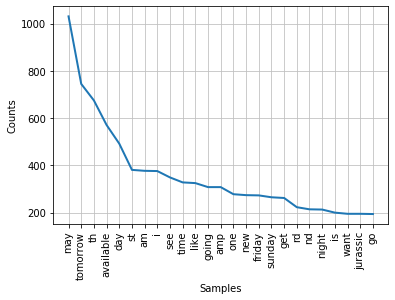

In [17]:
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

# Building the wordcloud


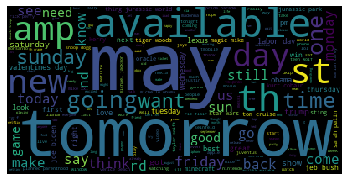

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(cleaned_sent)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Build word frequency model for  Tweets group by category

In [85]:
Clean_sent_arr=[]
for cleaned_tweet in cleaned_tweets.split("."):
    Clean_sent_arr.append(cleaned_tweet)

In [20]:
df = pd.DataFrame(Clean_sent_arr,columns =['Tweet']) 

In [21]:
df_col_merge =pd.concat([df, data_set['Category']], axis=1)

In [22]:
dataset = df_col_merge.dropna(how='any',axis=0)

# Exploratory Data Analysis 

In [23]:
dataset.head()

Tweet  Category
0                                          available  negative
1   ios  app transport security mm need check rd ...   neutral
2                    mar ios device download app too   neutral
3   phone run latest ios may account problem day ...  negative
4   sure start publication ios well live helping ...  positive

In [24]:
dataset.tail()

Tweet  Category
5963   ok ed lets this zlatan greizmann laporte tomo...  positive
5964   goal level zlatan  k friday  posting every da...   neutral
5965   surprise enquiredhe cannot  happy playing nd ...   neutral
5966   rib injury zlatan russia big blow misses aust...   neutral
5967   noooooo hoping see zlatan zlatan tuesday oh w...   neutral

In [25]:
dataset.describe()

Tweet  Category
count         5968      5968
unique        5418         4
top      available  positive
freq           546      2888

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5968 entries, 0 to 5967
Data columns (total 2 columns):
Tweet       5968 non-null object
Category    5968 non-null object
dtypes: object(2)
memory usage: 139.9+ KB


# Filter Negative dataset and build word frequency 

In [28]:
dataset_Negative=dataset[dataset['Category'] == "negative"]

In [29]:
dataset_Negative=dataset_Negative['Tweet']

In [30]:
type(dataset_Negative)

pandas.core.series.Series

In [31]:
cleaned_text = ""
cleaned_sent = ""
for dataset_Tweet in dataset_Negative:
    cleaned_text=text_prepare(dataset_Tweet)
    cleaned_sent=cleaned_sent + cleaned_text
    

# Tokenize the data

In [32]:
word_tokens = nltk.word_tokenize(cleaned_sent)


In [33]:
words_counts = {}
for word in word_tokens:
    if word in words_counts:
        words_counts[word] = words_counts[word] + 1
    else:
        words_counts[word] = 1 

In [34]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:20]


<FreqDist with 3649 samples and 9989 outcomes>
[('may', 218), ('th', 101), ('tomorrow', 89), ('st', 88), ('available', 87), ('like', 78), ('day', 60), ('trump', 58), ('planned', 55), ('parenthood', 50), ('sarah', 49), ('palin', 49), ('jeb', 48), ('obama', 47), ('amp', 46), ('bush', 46), ('time', 43), ('one', 43), ('get', 43), ('think', 41), ('tory', 41), ('going', 40), ('rick', 40), ('perry', 38), ('rd', 37)]


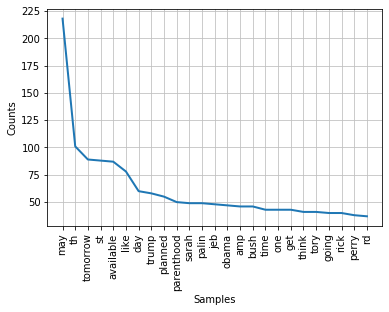

In [35]:
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

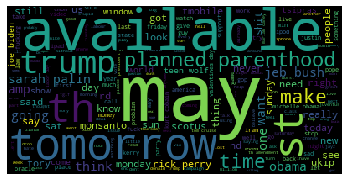

In [36]:
wordcloud = WordCloud().generate(cleaned_sent)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Filter Posative dataset and build word frequency

In [37]:
dataset_Positive=dataset[dataset['Category'] == "positive"]

In [38]:
dataset_Positive=dataset_Positive['Tweet']

In [39]:
cleaned_text = ""
cleaned_sent = ""
for dataset_Tweet in dataset_Negative:
    cleaned_text=text_prepare(dataset_Tweet)
    cleaned_sent=cleaned_sent + cleaned_text

In [40]:
word_tokens = nltk.word_tokenize(cleaned_sent)

In [41]:
words_counts = {}
for word in word_tokens:
    if word in words_counts:
        words_counts[word] = words_counts[word] + 1
    else:
        words_counts[word] = 1 

In [42]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:20]

<FreqDist with 3649 samples and 9989 outcomes>
[('may', 218), ('th', 101), ('tomorrow', 89), ('st', 88), ('available', 87), ('like', 78), ('day', 60), ('trump', 58), ('planned', 55), ('parenthood', 50), ('sarah', 49), ('palin', 49), ('jeb', 48), ('obama', 47), ('amp', 46), ('bush', 46), ('time', 43), ('one', 43), ('get', 43), ('think', 41), ('tory', 41), ('going', 40), ('rick', 40), ('perry', 38), ('rd', 37)]


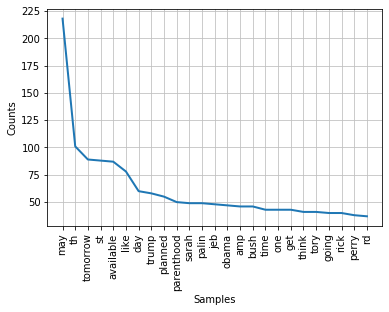

In [43]:
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

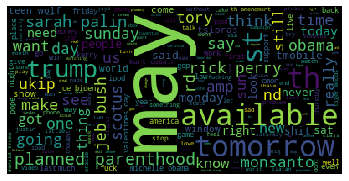

In [44]:
wordcloud = WordCloud().generate(cleaned_sent)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Filter Neutral dataset and build word frequency

In [45]:
dataset_Neutral=dataset[dataset['Category'] == "neutral"]
dataset_Neutral=dataset_Neutral['Tweet']
cleaned_text = ""
cleaned_sent = ""
for dataset_Tweet in dataset_Negative:
    cleaned_text=text_prepare(dataset_Tweet)
    cleaned_sent=cleaned_sent + cleaned_text
word_tokens = nltk.word_tokenize(cleaned_sent)
words_counts = {}
for word in word_tokens:
    if word in words_counts:
        words_counts[word] = words_counts[word] + 1
    else:
        words_counts[word] = 1 
        

<FreqDist with 3649 samples and 9989 outcomes>
[('may', 218), ('th', 101), ('tomorrow', 89), ('st', 88), ('available', 87), ('like', 78), ('day', 60), ('trump', 58), ('planned', 55), ('parenthood', 50), ('sarah', 49), ('palin', 49), ('jeb', 48), ('obama', 47), ('amp', 46), ('bush', 46), ('time', 43), ('one', 43), ('get', 43), ('think', 41), ('tory', 41), ('going', 40), ('rick', 40), ('perry', 38), ('rd', 37)]


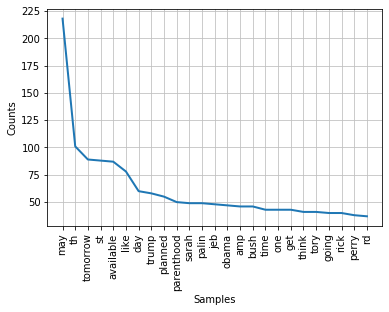

In [46]:
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

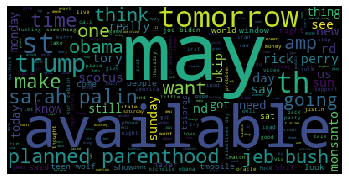

In [47]:
wordcloud = WordCloud().generate(cleaned_sent)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Build a model using KMeans 

In [48]:
#Text clustering with K-means
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [49]:
df=df.iloc[:,0]

In [50]:
vectorizer = TfidfVectorizer(stop_words='english')

In [51]:
X = vectorizer.fit_transform(df)
print(X)

  (0, 651)	1.0
  (1, 5041)	0.21440451862741225
  (1, 423)	0.26194111019554084
  (1, 10284)	0.35777973749498476
  (1, 8738)	0.31695547892152504
  (1, 6345)	0.34580578048191857
  (1, 6619)	0.21100490034761607
  (1, 1633)	0.24325482018780578
  (1, 7978)	0.1786351353713891
  (1, 7179)	0.21714983349627873
  (1, 6647)	0.30766775630326165
  (1, 7456)	0.3746560820423121
  (1, 9703)	0.34580578048191857
  (2, 5041)	0.3450803370453695
  (2, 423)	0.42158965291862455
  (2, 5988)	0.4951858931090083
  (2, 2604)	0.4680237106057291
  (2, 2850)	0.48880104655502365
  (3, 5041)	0.2763551786535697
  (3, 7324)	0.2899194462345013
  (3, 8506)	0.297823214130957
  (3, 5532)	0.3965661652256802
  (3, 48)	0.38678486498832265
  (3, 7683)	0.38678486498832265
  (3, 2400)	0.19258293893812292
  :	:
  (5965, 3163)	0.399458149589036
  (5966, 10393)	0.1629657386222394
  (5966, 3919)	0.1722979359452133
  (5966, 1584)	0.2189315842212177
  (5966, 6654)	0.13772604697183521
  (5966, 949)	0.18425461744938157
  (5966, 4917)	0.28

**Build the clusters**

In [52]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Profile the clusters: Top terms per cluster**

In [53]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),

Cluster 0:
 th
 st
 time
 like
 friday
 sunday
 amp
 rd
 nd
 new
Cluster 1:
 tomorrow
 going
 wolf
 teen
 watch
 ill
 ted
 night
 want
 new
Cluster 2:
 day
 valentines
 labor
 th
 tomorrow
 weekend
 sunday
 monday
 today
 friday
Cluster 3:
 available
 zurich
 foxnews
 frame
 fragments
 fragile
 fractured
 frackin
 fr
 foxy


In [54]:
#Use model for prediction
print("\n")
print("Prediction")
Y = vectorizer.transform(["valentines"])
prediction = model.predict(Y)
print(prediction)



Prediction
[2]


# Build a model using Naiv Bayesian

In [55]:
dataset_list_train = dataset[0:4500].values.tolist()
dataset_list_test = dataset[4500:5967].values.tolist()


In [56]:
model=NaiveBayesClassifier(dataset_list_train)

**Model Accuracy on trainig set**

In [57]:
print(model.accuracy(dataset_list_train))

0.8462222222222222


**Model Accuracy on trainig set**

In [58]:
print(model.accuracy(dataset_list_test))

0.5173824130879345


In [59]:
model.show_informative_features(5)

Most Informative Features
           contains(jeb) = True           negati : positi =     40.2 : 1.0
         contains(sarah) = True           negati : positi =     24.6 : 1.0
          contains(bush) = True           negati : positi =     24.4 : 1.0
         contains(palin) = True           negati : positi =     24.1 : 1.0
        contains(scotus) = True           negati : positi =     20.3 : 1.0


In [60]:
model.classify("ios  app transport security mm need to check if my rd party network pod supports it")

'neutral'

In [61]:
prob_dist = model.prob_classify("five great free apps and games for ios  august th edition  it is that time of the week again news lchbuzz")

In [62]:
prob_dist.max()

'positive'

**Probability distribution**

In [63]:
round(prob_dist.prob("positive"), 2)

1.0

In [64]:
round(prob_dist.prob("neutral"), 2)

0.0

In [65]:
round(prob_dist.prob("negative"), 2)

0.0

# Build Lexican Based Model

**Sentence Tokenization**

In [66]:
tokenized_text=sent_tokenize(cleaned_tweets)


**Word Tokenization**

In [67]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(cleaned_tweets)

**Frequency Distribution**

In [68]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)


In [69]:
fdist.most_common(2)

[('.', 5845), ('may', 1031)]

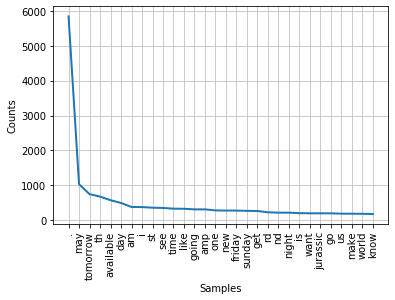

In [70]:
fdist.plot(30,cumulative=False)
plt.show()

**Removing Stopwords**

In [71]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{"weren't", 'on', 'll', "mightn't", 'while', 'don', 'out', 'doesn', 'needn', 'was', 'hasn', 'both', 'some', 'than', 'until', 'if', 'more', "hadn't", 'after', 'over', 'couldn', "wasn't", "should've", 'doing', 'to', 'or', 'herself', 'been', 'by', 'again', 'themselves', 'they', 'didn', "you'd", "shouldn't", 'those', 'mustn', 'weren', 'once', "that'll", 'now', 'we', "needn't", 'there', 'haven', 'isn', 'myself', 'do', 'these', 'shouldn', 'this', 'but', 'having', 'why', 'the', 'can', "doesn't", "shan't", "aren't", 'whom', 'which', 'each', 'am', 'further', 'down', 'o', 'it', 'their', "didn't", 'then', "hasn't", 'theirs', 'other', "you've", 'himself', 'how', 'mightn', 'and', 'here', 'm', 'is', 'into', 'hers', 'through', 'too', 'ain', 'between', 'wouldn', 'a', 'an', 'our', 'has', 'wasn', 'that', 'have', 'me', 'as', 'with', 'are', "wouldn't", 'at', 'ourselves', 's', 'no', "haven't", 're', 'during', 'few', "couldn't", 'should', 'in', 'above', 'itself', 'below', 'be', 'not', 'from', "don't", 'unde

In [72]:
filtered_sent=[]
for w in tokenized_text:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_text)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: [' available.', 'ios  app transport security mm need check rd party network pod supports.', 'mar ios device download app too.', 'phone run latest ios may account problem day  time replaced.', 'sure start publication ios well live helping ask anything sessions today friday.', 'two dollar tuesday forklift  quickkey ios suite pages  today  .', 'already signed test ios game nows chance.', 'youtube gaming officially launches web android ios august  youtube finally going r webseries.', 'youtube gaming launches tomorrow ios android apps go headtohead twitch ios game.', 'yashan bbc vpn access ios may limited chinas military parade chance chat that.', 'parkrun app ios downloaded great app easier access info amp ready saturdays run.', 'today launches apps ios android devices us uk need know.', 'got project want work on need help swift need excuse hang ios devs sat hang us.', 'met ios developer today may go .', 'crossskyhigh going ios saturday try indiedev.', 'whats best way g

# Lexicon Normalization

**Stemming**

In [73]:
ps = PorterStemmer()
stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: [' available.', 'ios  app transport security mm need check rd party network pod supports.', 'mar ios device download app too.', 'phone run latest ios may account problem day  time replaced.', 'sure start publication ios well live helping ask anything sessions today friday.', 'two dollar tuesday forklift  quickkey ios suite pages  today  .', 'already signed test ios game nows chance.', 'youtube gaming officially launches web android ios august  youtube finally going r webseries.', 'youtube gaming launches tomorrow ios android apps go headtohead twitch ios game.', 'yashan bbc vpn access ios may limited chinas military parade chance chat that.', 'parkrun app ios downloaded great app easier access info amp ready saturdays run.', 'today launches apps ios android devices us uk need know.', 'got project want work on need help swift need excuse hang ios devs sat hang us.', 'met ios developer today may go .', 'crossskyhigh going ios saturday try indiedev.', 'whats best way ge

**Lemmatization**

**Lexicon Normalization
performing stemming and Lemmatization**

In [74]:
lem = WordNetLemmatizer()
stem  = PorterStemmer()
lem_words=[]
for w in tokenized_word:
    lem_words.append(lem.lemmatize(w))
print("Lemmatized Word:",lem_words)


Lemmatized Word: ['available', '.', 'io', 'app', 'transport', 'security', 'mm', 'need', 'check', 'rd', 'party', 'network', 'pod', 'support', '.', 'mar', 'io', 'device', 'download', 'app', 'too', '.', 'phone', 'run', 'latest', 'io', 'may', 'account', 'problem', 'day', 'time', 'replaced', '.', 'sure', 'start', 'publication', 'io', 'well', 'live', 'helping', 'ask', 'anything', 'session', 'today', 'friday', '.', 'two', 'dollar', 'tuesday', 'forklift', 'quickkey', 'io', 'suite', 'page', 'today', '.', 'already', 'signed', 'test', 'io', 'game', 'now', 'chance', '.', 'youtube', 'gaming', 'officially', 'launch', 'web', 'android', 'io', 'august', 'youtube', 'finally', 'going', 'r', 'webseries', '.', 'youtube', 'gaming', 'launch', 'tomorrow', 'io', 'android', 'apps', 'go', 'headtohead', 'twitch', 'io', 'game', '.', 'yashan', 'bbc', 'vpn', 'access', 'io', 'may', 'limited', 'china', 'military', 'parade', 'chance', 'chat', 'that', '.', 'parkrun', 'app', 'io', 'downloaded', 'great', 'app', 'easier', 

**POS Tagging**

In [75]:
tokens=word_tokenize(cleaned_tweets)
print(tokens)

['available', '.', 'ios', 'app', 'transport', 'security', 'mm', 'need', 'check', 'rd', 'party', 'network', 'pod', 'supports', '.', 'mar', 'ios', 'device', 'download', 'app', 'too', '.', 'phone', 'run', 'latest', 'ios', 'may', 'account', 'problem', 'day', 'time', 'replaced', '.', 'sure', 'start', 'publication', 'ios', 'well', 'live', 'helping', 'ask', 'anything', 'sessions', 'today', 'friday', '.', 'two', 'dollar', 'tuesday', 'forklift', 'quickkey', 'ios', 'suite', 'pages', 'today', '.', 'already', 'signed', 'test', 'ios', 'game', 'nows', 'chance', '.', 'youtube', 'gaming', 'officially', 'launches', 'web', 'android', 'ios', 'august', 'youtube', 'finally', 'going', 'r', 'webseries', '.', 'youtube', 'gaming', 'launches', 'tomorrow', 'ios', 'android', 'apps', 'go', 'headtohead', 'twitch', 'ios', 'game', '.', 'yashan', 'bbc', 'vpn', 'access', 'ios', 'may', 'limited', 'chinas', 'military', 'parade', 'chance', 'chat', 'that', '.', 'parkrun', 'app', 'ios', 'downloaded', 'great', 'app', 'easier

In [76]:
nltk.pos_tag(tokens)

[('available', 'JJ'),
 ('.', '.'),
 ('ios', 'NNS'),
 ('app', 'VBP'),
 ('transport', 'JJ'),
 ('security', 'NN'),
 ('mm', 'NNS'),
 ('need', 'VBP'),
 ('check', 'VB'),
 ('rd', 'NN'),
 ('party', 'NN'),
 ('network', 'NN'),
 ('pod', 'NN'),
 ('supports', 'NNS'),
 ('.', '.'),
 ('mar', 'NN'),
 ('ios', 'JJ'),
 ('device', 'NN'),
 ('download', 'NN'),
 ('app', 'NN'),
 ('too', 'RB'),
 ('.', '.'),
 ('phone', 'NN'),
 ('run', 'NN'),
 ('latest', 'JJS'),
 ('ios', 'NN'),
 ('may', 'MD'),
 ('account', 'VB'),
 ('problem', 'NN'),
 ('day', 'NN'),
 ('time', 'NN'),
 ('replaced', 'VBN'),
 ('.', '.'),
 ('sure', 'JJ'),
 ('start', 'JJ'),
 ('publication', 'NN'),
 ('ios', 'NNS'),
 ('well', 'RB'),
 ('live', 'VBP'),
 ('helping', 'VBG'),
 ('ask', 'VB'),
 ('anything', 'NN'),
 ('sessions', 'NNS'),
 ('today', 'NN'),
 ('friday', 'VBP'),
 ('.', '.'),
 ('two', 'CD'),
 ('dollar', 'NN'),
 ('tuesday', 'NN'),
 ('forklift', 'VB'),
 ('quickkey', 'JJ'),
 ('ios', 'NNS'),
 ('suite', 'JJ'),
 ('pages', 'NNS'),
 ('today', 'NN'),
 ('.', '.'

In [77]:
dataset.Category.value_counts()

positive    2888
neutral     2123
negative     956
Tweet          1
Name: Category, dtype: int64

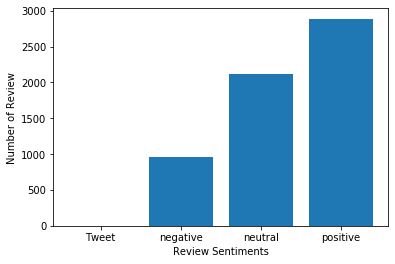

In [78]:
Sentiment_count=dataset.groupby('Category').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Tweet'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

**Tokenizer to remove unwanted elements from out data like symbols and numbers**

In [79]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cvect = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cvect.fit_transform(dataset['Tweet'])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, dataset['Category'], test_size=0.3, random_state=1)

**Model Generation Using Multinomial Naive Bayes**

In [81]:
model = MultinomialNB().fit(X_train, y_train)
predicted= model.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5689558905639308


**TF-IDF Vectorizer**

In [82]:
tf=TfidfVectorizer()
text_tf= tf.fit_transform(dataset['Category'])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, dataset['Category'], test_size=0.3, random_state=123)

**Model Generation Using Multinomial Naive Bayes**

In [84]:
model = MultinomialNB().fit(X_train, y_train)
predicted= model.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9994416527079844
